In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Module 2: Data Wrangling

In [6]:
df.drop(['Unnamed: 0','id'] , axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [8]:
# Module 2: Data Wrangling
mean=df['bedrooms'].mean()
mean=df['bathrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [9]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis


In [9]:
df['floors'].value_counts().to_frame() 

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<Axes: xlabel='waterfront', ylabel='price'>

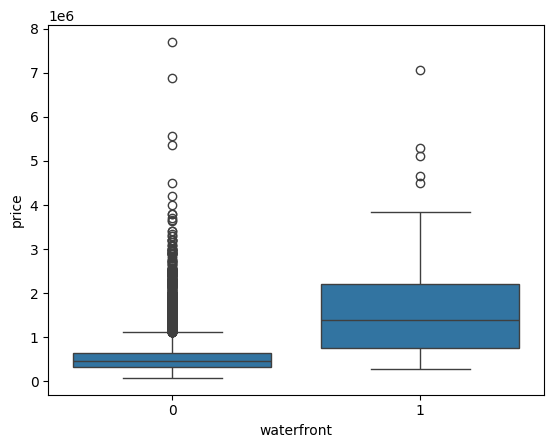

In [10]:

sns.boxplot(x='waterfront', y='price', data=df)


<Axes: xlabel='sqft_above', ylabel='price'>

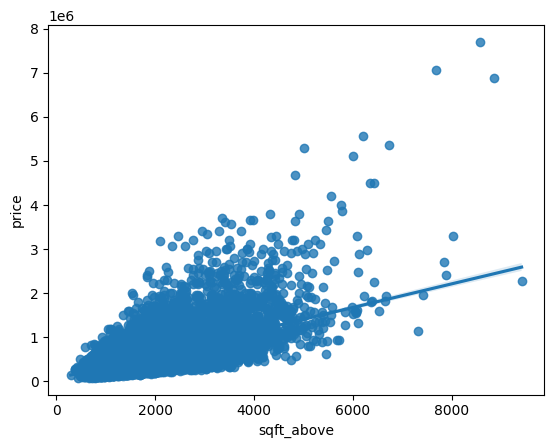

In [11]:
sns.regplot(x='sqft_above', y='price', data=df)

<Axes: xlabel='sqft_living', ylabel='price'>

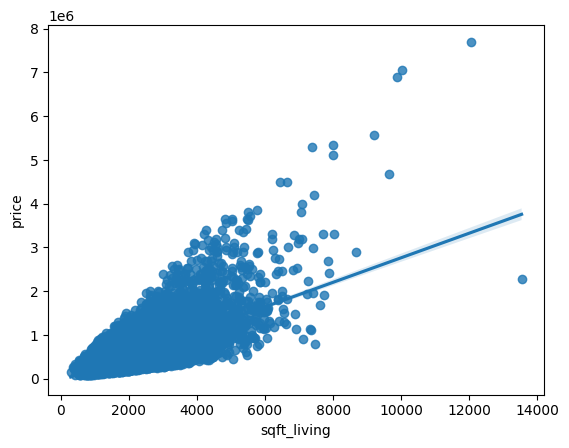

In [12]:

sns.regplot(x='sqft_living', y='price', data=df)


# Module 4: Model Development


We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.


In [13]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Extracting features and target variable
X = df[['sqft_living']]
y = df['price']

# Initialize linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Calculate R^2 score
r2 = r2_score(y, y_pred)
print("R^2 score:", r2)


R^2 score: 0.4928532179037931


In [15]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

Then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [16]:

# Define features and target variable
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df['price']

# Initialize linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Calculate R^2 score
r2 = r2_score(y, y_pred)
print("R^2 score: ", r2)

R^2 score:  0.6577011453024371


In [17]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [18]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
target = 'price'

# Split the data into features (X) and target variable (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with a Linear Regression model
pipeline = Pipeline([
    ('linear_regression', LinearRegression())
])

# Fit the pipeline using the features specified
pipeline.fit(X_train, y_train)

# Predict on the training set
y_pred_train = pipeline.predict(X_train)

# Calculate R^2 score
r2 = r2_score(y_train, y_pred_train)
print("R^2 score :", r2)

R^2 score : 0.6564060938323953


# Module 5: Model Evaluation and Refinement
Import the necessary modules:


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:


In [20]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 2162
number of training samples: 19451


In [21]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Assuming your data is already loaded into a pandas DataFrame called 'data'
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
target = ['price']

# Split the data into features (X) and target variable (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Ridge regression object with regularization parameter set to 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = ridge_model.predict(X_test)

# Calculate R^2 score
r2_test = r2_score(y_test, y_pred_test)
print("R^2 score on test data:", r2_test)


R^2 score on test data: 0.6614350275808172


In [22]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit a Ridge regression object with regularization parameter set to 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_test = ridge_model.predict(X_test_poly)

# Calculate R^2 score
r2_test = r2_score(y_test, y_pred_test)
print("R^2 score on test data (polynomial features):", r2_test)


R^2 score on test data (polynomial features): 0.7000727105688938


# Some Practice Training with the given Data

In [23]:
from ipywidgets import interact, interactive,fixed,interact_manual

In [24]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.ylabel('Price (in dollars)')
    plt.xlabel('Proportion of Houses')
    plt.show()
    plt.close()

In [25]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 15
    height = 12
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.2)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 6000000])
    plt.ylabel('Price')
    plt.legend()

In [26]:
from sklearn.model_selection import train_test_split
x_data = df.drop('price',axis=1)
y_data = df['price']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
print("Number of test sample: " ,x_test.shape[0])
print("Number of training sample: " ,x_train.shape[0])

Number of test sample:  2162
Number of training sample:  19451


In [27]:
#x_train, x_test, y_train, x_test = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
#print("Number of test sample: " ,x_test.shape[0])
#print("Number of training sample: " ,x_train.shape[0])

In [28]:
#IMPORT Linear Regression 
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
X = df[["sqft_living"]]
Y = df["price"]
lr.fit(X,Y)


LinearRegression()

In [29]:
#yhat = lr.predict(X)
lr.score(X,Y)
#yhat[0:5]

0.4928532179037931

In [30]:
lr.intercept_

-43580.743094479316

In [31]:
lr.coef_

array([280.6235679])

<Axes: >

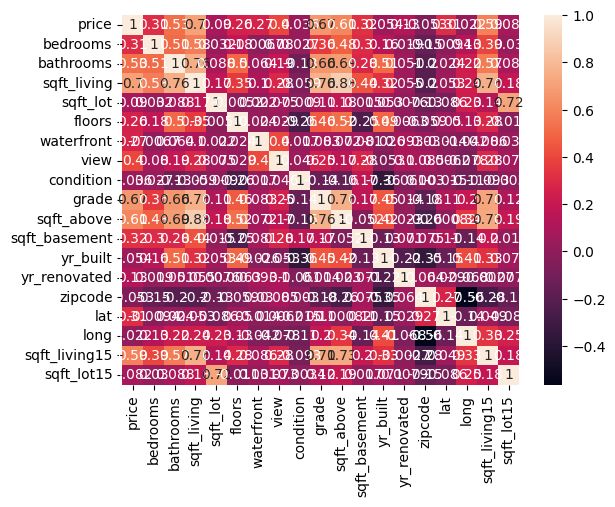

In [32]:
df.drop(['date'],axis=1, inplace=True)
sns.heatmap(df.corr(),annot=True)


# Above table 
1. The closer to 1, the stronger the correlation between these variables.

2. A minus sign means that these 2 variables are negatively correlated, i.e. one decreases with increasing the other and vice versa.

In [33]:
yhat = lr.intercept_+lr.coef_*X
yhat

,sqft_living
0,287555.067025
1,677621.826402
2,172499.404187
3,506441.449985
4,427866.850973
...,...
21608,385773.315789
21609,604659.698749
21610,242655.296161
21611,405416.965541


In [34]:
lr.fit(x_train[['sqft_living','sqft_above','grade']],y_train)

LinearRegression()

In [35]:
lr.score(x_train[["sqft_living",'sqft_above','grade']],y_train)

0.5427204560223338

In [36]:
lr= LinearRegression()
lr.fit(x_train[['sqft_living','sqft_above','grade']],y_train)
yhat_train = lr.predict(x_train[['sqft_living','sqft_above','grade']])
yhat_train[0:5]

array([886472.92141052, 466575.84235315, 344303.15670453, 471489.21705103,
       438525.53371162])

In [37]:
lr= LinearRegression()
lr.fit(x_train[['sqft_living','sqft_above','grade']],y_train)
yhat_test = lr.predict(x_test[['sqft_living','sqft_above','grade']])
yhat_test[0:5]

array([774549.60452555, 399752.95354482, 928894.11966953, 693949.03992327,
       266670.74445738])

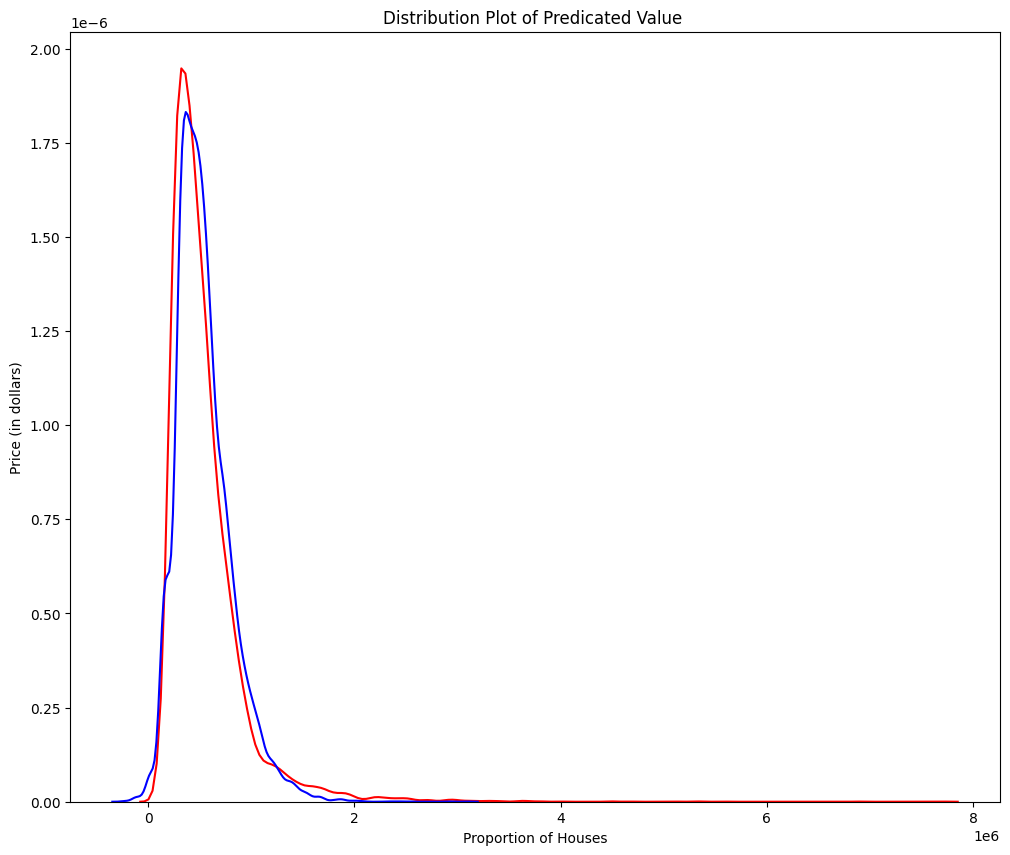

In [38]:
Title = 'Distribution Plot of Predicated Value '
DistributionPlot(y_train,yhat_train,"Actual Value(Train)","Prediction Value (Train)", Title)
#PollyPlot(y_train,yhat_train,"A","B", Title)

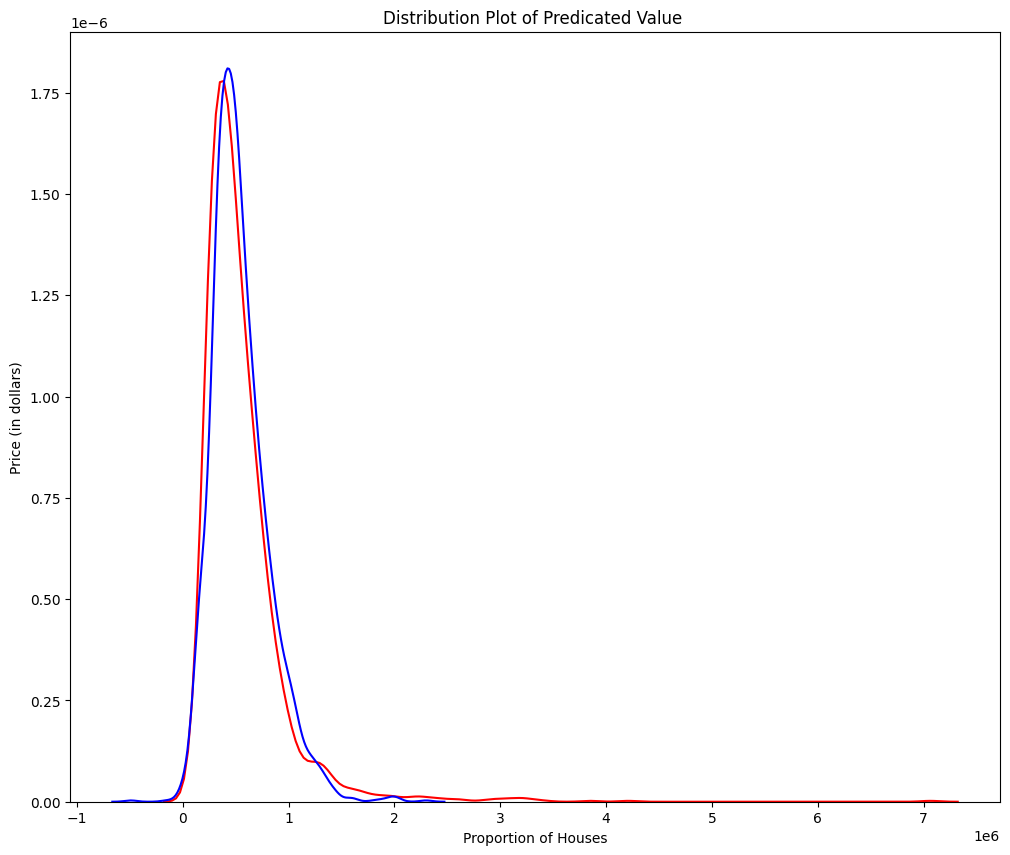

In [39]:
Title = 'Distribution Plot of Predicated Value '
DistributionPlot(y_test,yhat_test,"Actual Value(Test)","Prediction Value(Test)",Title)

In [40]:
from sklearn.model_selection import cross_val_score

Rc=cross_val_score(lr,x_data[['sqft_living']], y_data,cv=2)
Rc.mean()


0.49178051290783953

In [41]:
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lr,x_data[['sqft_living']], y_data,cv=4)
yhat[0:5]

array([289097.80337708, 676049.91415715, 174960.84983763, 506236.39791554,
       428289.2101325 ])

In [42]:
#overfitting
from sklearn.preprocessing import PolynomialFeatures

In [43]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['sqft_living']])
x_test_pr = pr.fit_transform(x_test[['sqft_living']])
pr

PolynomialFeatures(degree=5)

In [44]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [45]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([682066.42250725, 411937.44554547, 571693.83870105, 547526.56492906,
       376520.56038572])

In [46]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [682066.42250725 411937.44554547 571693.83870105 547526.56492906]
True values: [ 459000.  445000. 1057000.  732350.]


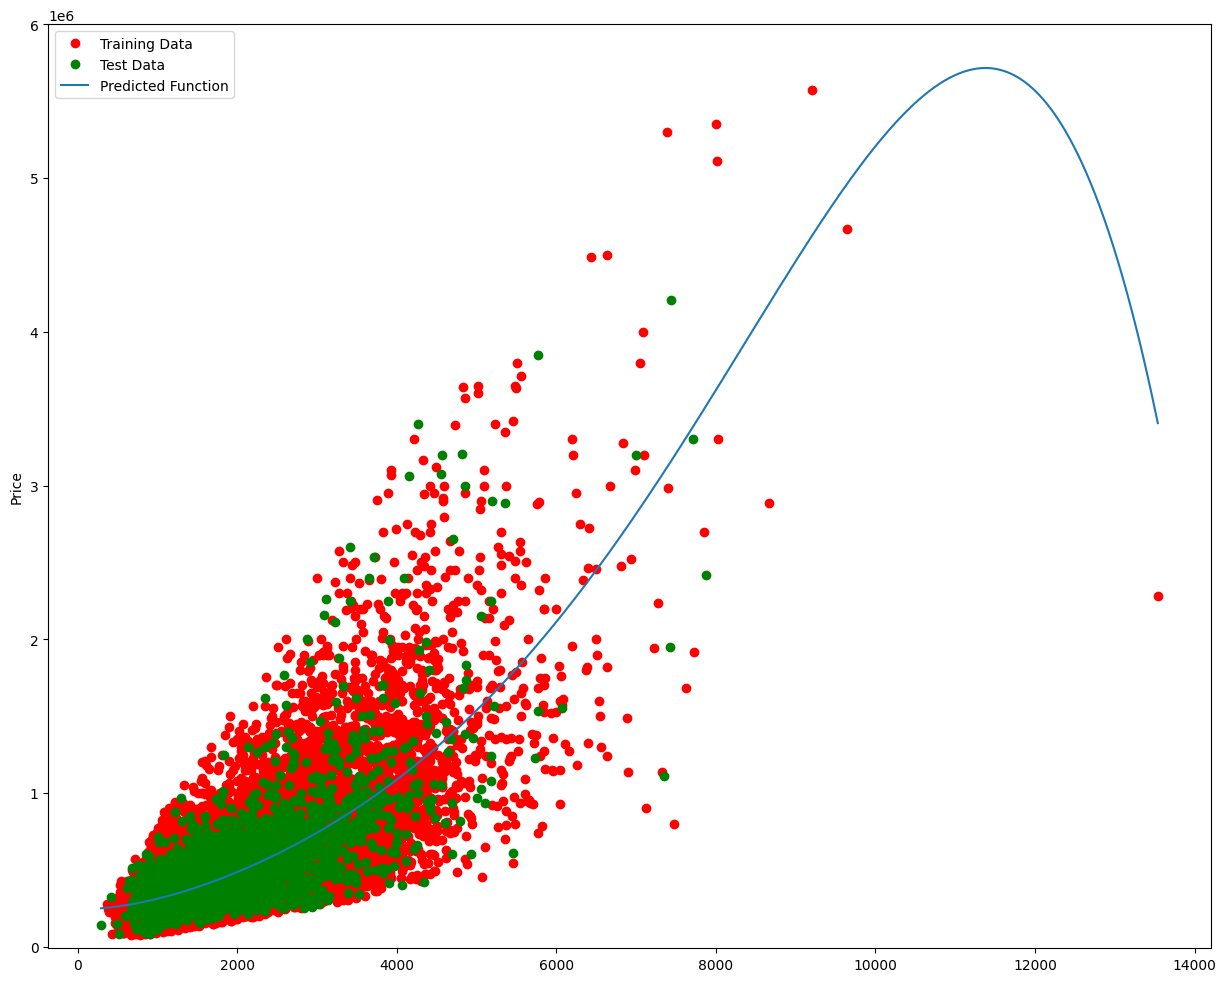

In [47]:
PollyPlot(x_train['sqft_living'], x_test['sqft_living'], y_train, y_test, poly,pr)

In [48]:
poly.score(x_train_pr, y_train)

0.5420543375246611

In [49]:
poly.score(x_test_pr, y_test)

0.5543995465315845

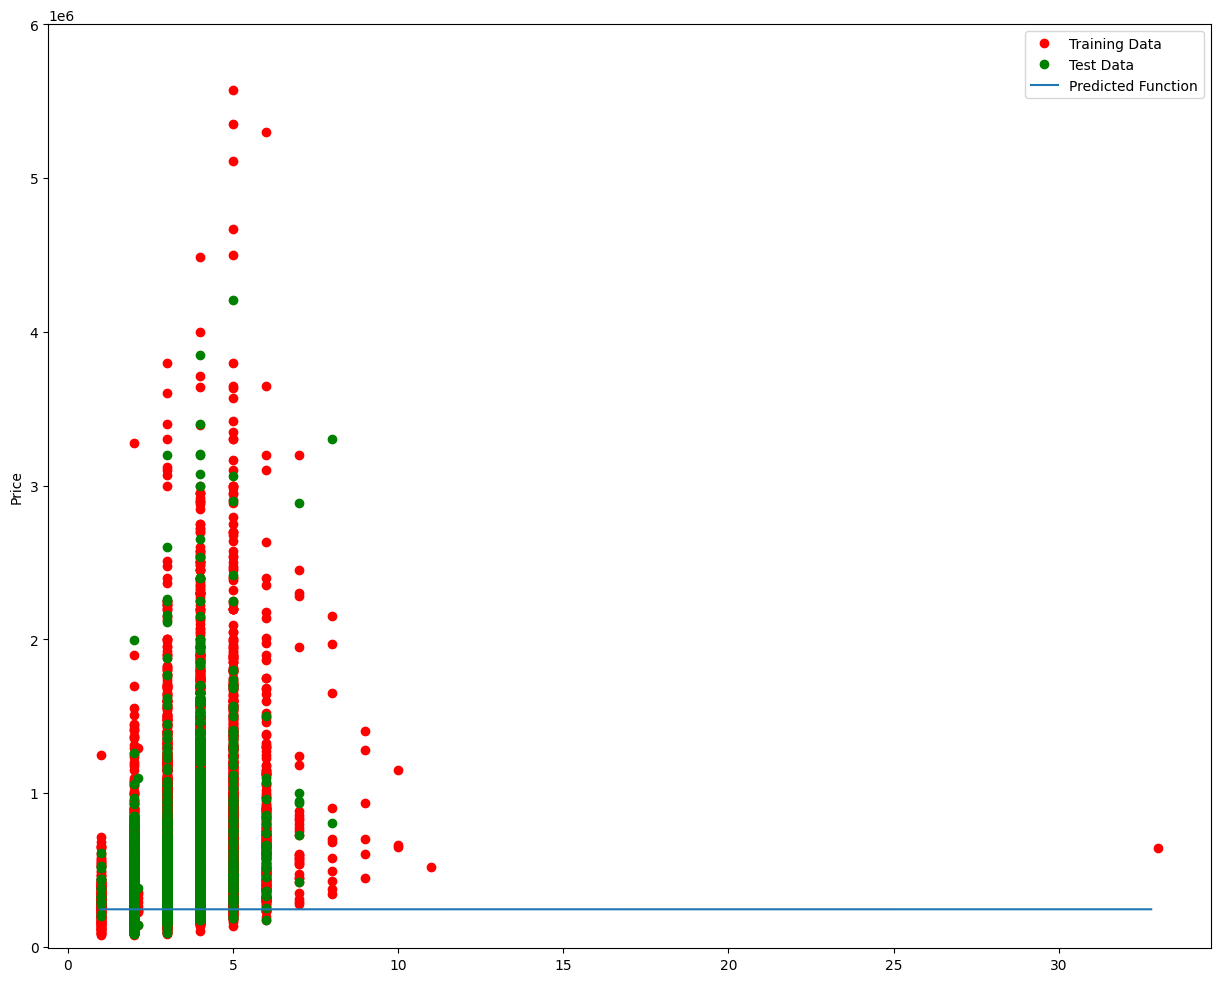

In [50]:
PollyPlot(x_train['bedrooms'], x_test['bedrooms'], y_train, y_test, poly,pr)

In [51]:
poly.score(x_train_pr, y_train)

0.5420543375246611

In [52]:
poly.score(x_test_pr, y_test)

0.5543995465315845

Text(3, 0.75, 'Maximum R^2 ')

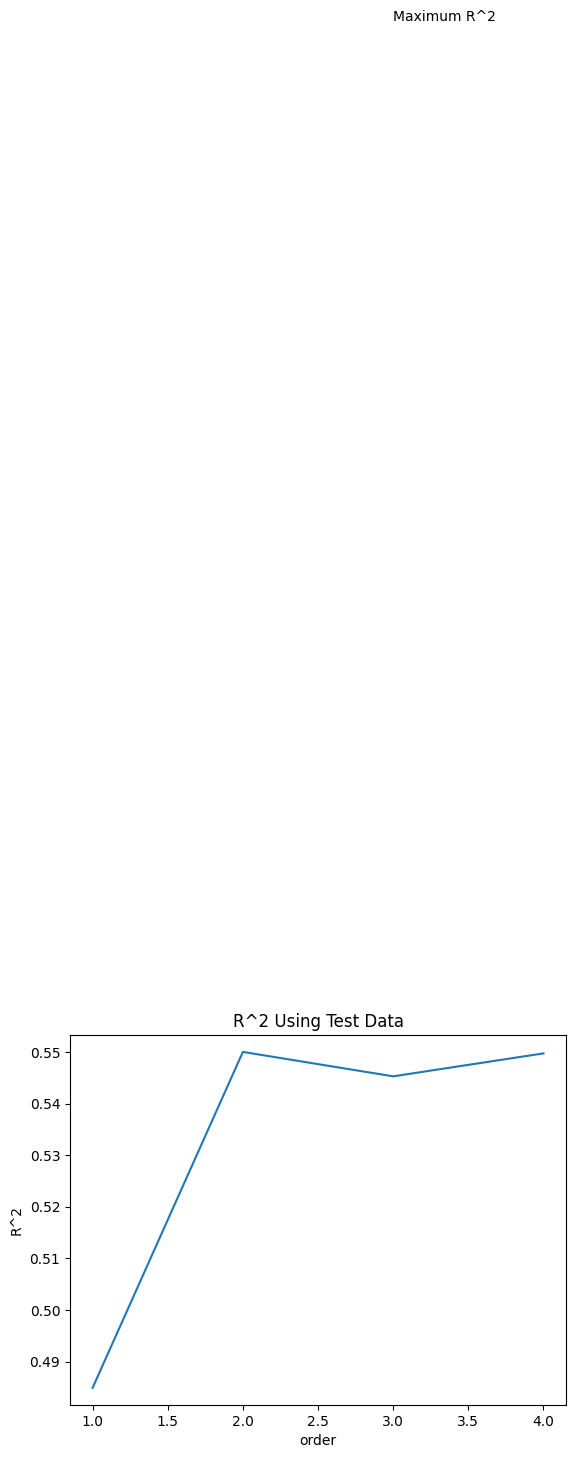

In [53]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['sqft_living']])
    
    x_test_pr = pr.fit_transform(x_test[['sqft_living']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    


# We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.


In [54]:
pr1=PolynomialFeatures(degree=2)


In [55]:
x_train_pr1=pr1.fit_transform(x_train[['sqft_living', 'sqft_above', 'grade']])

x_test_pr1=pr1.fit_transform(x_test[['sqft_living', 'sqft_above', 'grade']])


In [56]:
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)


LinearRegression()

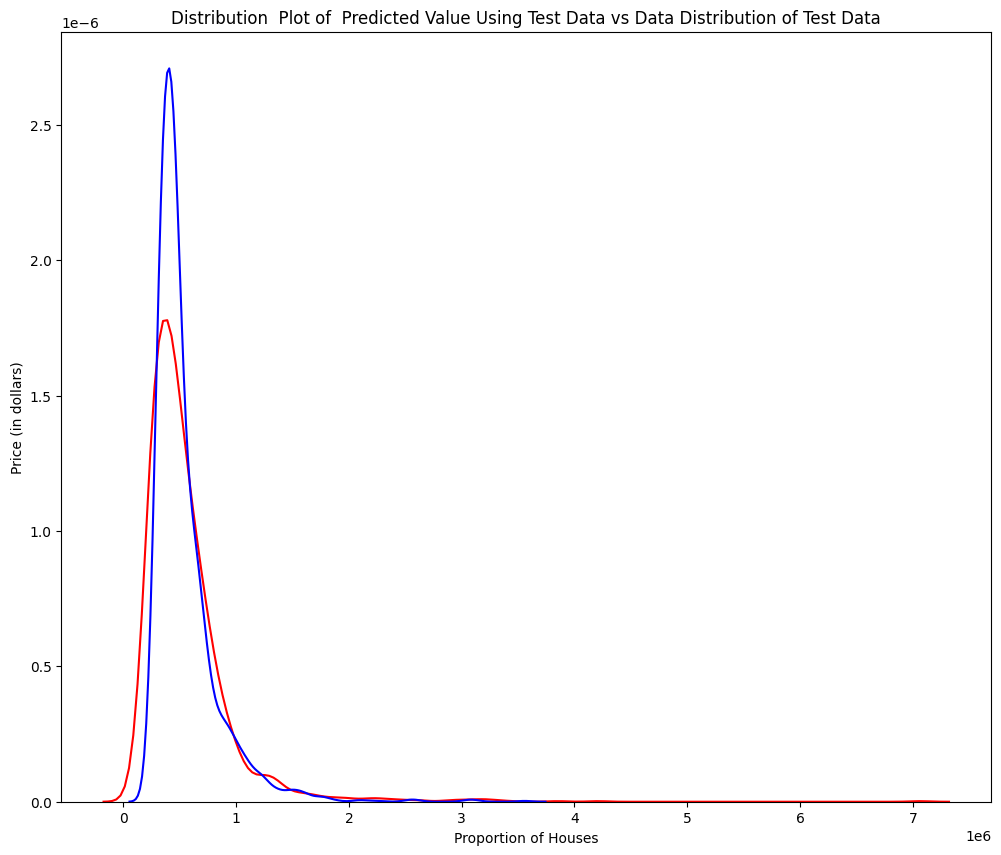

In [57]:
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

# Ridge Regression 
let's import the ridge regression 

In [58]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['bedrooms', 'sqft_living', 'grade','floors','view']])
x_test_pr=pr.fit_transform(x_test[['bedrooms','sqft_living', 'grade','floors','view']])

In [59]:
from sklearn.linear_model import Ridge

In [60]:
RigeModel=Ridge(alpha=1)

In [61]:
RigeModel.fit(x_train_pr, y_train)

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.77266e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=1)

In [62]:
yhat = RigeModel.predict(x_test_pr)

# We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.


In [63]:
!pip install tqdm
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


  0%| | 1/1000 [00:00<02:53,  5.75it/s, Test Score=0.63, Train Score=0.6/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.77266e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
  0%| | 1/1000 [00:00<02:53,  5.75it/s, Test Score=0.63, Train Score=0.6/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.54531e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
  0%| | 3/1000 [00:00<01:25, 11.62it/s, Test Score=0.63, Train Score=0.6/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.31797e-17): result may not be accurate.
  return linalg.solve(A,

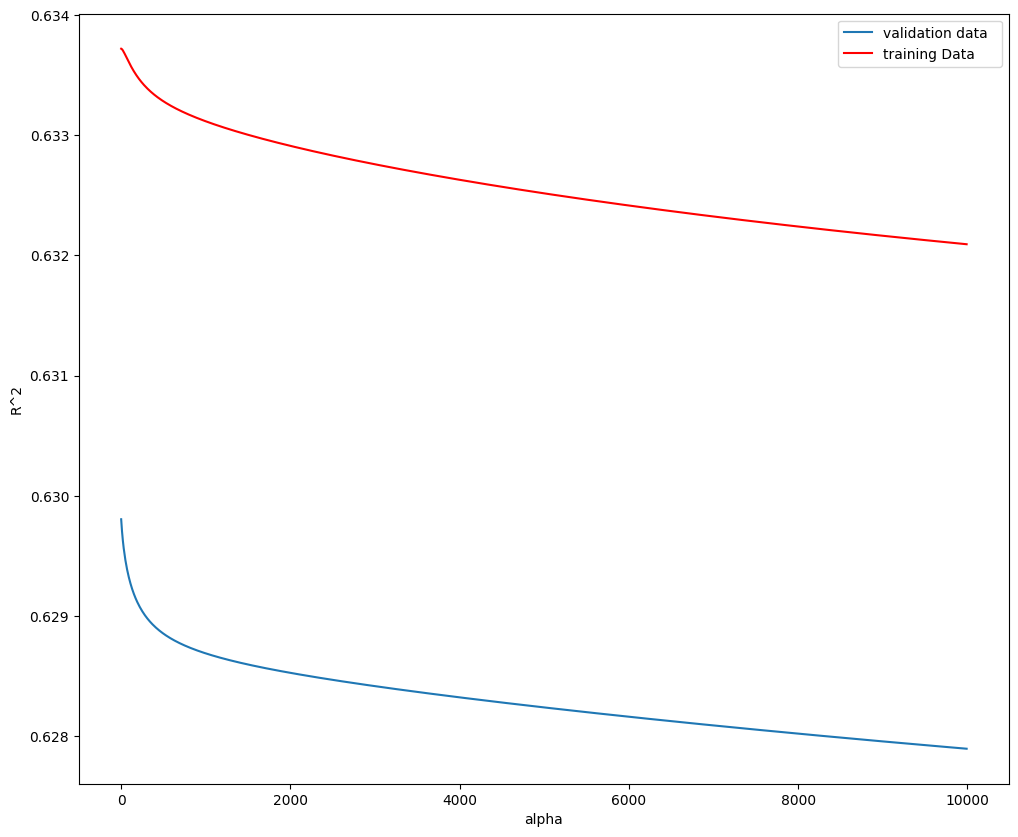

In [64]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [65]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)



/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.77266e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.6297025288459521

Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.

  #          @ANIL KUMAR ........